# 04a - Distributions and curves of MCMC steps for sampling low-energy states.

This notebook reproduces Fig. 4a from the manuscript, and Figs. S12, S13, S14 from the Supporting Information. The data in this notebook displays the ML-predicted (unrelaxed) energies of structures sampled with the MCMC approach.

In [1]:
import json
import itertools
from basics import *
from plotting import *
from matplotlib import cm
from ase import Atoms

plt.style.use("paper")

## Visualizing the Monte Carlo approach

In [2]:
facets = [100, 111, 211, 331, 410, 711]
nads = np.arange(2, 24)

In [3]:
df = pd.read_csv("../data/04-copper-mcmc/energies.csv.gz", compression="gzip", index_col=0)

In [4]:
len(df)

14454479

In [5]:
(df["energy"] / df["nads"]).describe()

count    1.445448e+07
mean     5.859387e-01
std      7.379139e-01
min     -5.662963e-01
25%     -2.519745e-02
50%      4.379659e-01
75%      1.049700e+00
max      5.640095e+00
dtype: float64

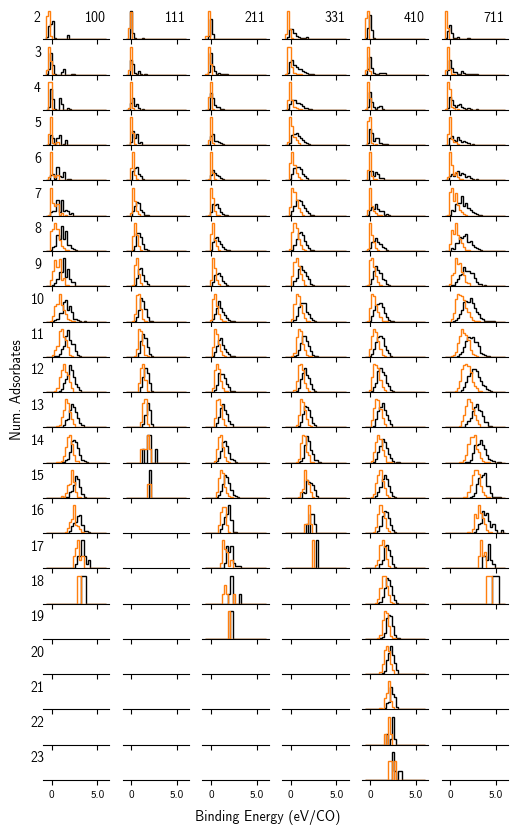

In [6]:
fig, axs = plt.subplots(22, 6, figsize=(6, 10), sharex=True)

bins = np.linspace(-0.6, 6.0, 30)

for facet, n in itertools.product(facets, nads):
    grp = df.loc[(df["facet"] == facet) & (df["nads"] == n)]
    i, j = n - 2, facets.index(facet)
    ax = axs[i, j]
    
    if len(grp) > 0:
        en = grp.pivot(index="move", columns="replica", values="energy")
        en = en / n

        ax.hist(en.iloc[0], bins=bins, color="k", histtype="step")
        ax.hist(en.min(0), bins=bins, color=cm.tab10(1), histtype="step")
    
    if i == 0:
        ax.annotate(facet, (0.95, 0.95), xycoords="axes fraction", ha="right", va="top")

for ax in axs.reshape(-1):
    ax.spines["left"].set_visible(False)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    
for ax in axs[-1, :]:
    ticks = [0, 5.0]
    ax.set_xticks(ticks)
    ax.set_xticklabels(ticks, fontsize=8)
#     ax.set_xlabel("E$_b$ (eV/CO)", fontsize=10)
    
for i, ax in enumerate(axs[:, 0], 2):
    ax.set_ylabel(i, rotation=0)

fig.supxlabel("Binding Energy (eV/CO)", y=0.065, fontsize=10)
fig.supylabel("Num. Adsorbates", x=0.07, fontsize=10)

savefig(fig, "04-mcmc-distributions.pdf")
plt.show()

## Visualizing the sampling curves

In [7]:
facet, n = 410, 10

with open(f"../data/04-copper-mcmc/configs/{facet}-{n:02d}.json", "r") as f:
    temps = json.load(f)["temperature"]

In [8]:
grp = df.loc[(df["facet"] == facet) & (df["nads"] == n)]
en = grp.pivot(index="move", columns="replica", values="energy")
en = en / n

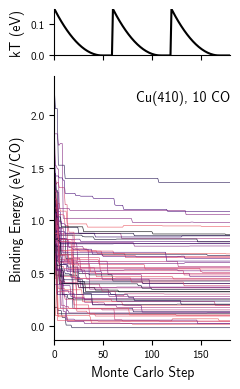

In [9]:
fig, axs = plt.subplots(2, 1, figsize=(2.5, 4), sharex=True, height_ratios=[0.15, 0.85])

norm = plt.Normalize(0, 1.5)
cmap = lambda x: cm.magma(norm(x))

def random_color():
    return cmap(np.random.uniform())

ax = axs[0]
ax.plot(temps, "k-")
ax.set_ylim(0, 0.15)
ax.set_ylabel("kT (eV)")

ax = axs[1]
for i, row in en.T.iterrows():
    if i % 15 != 0:
        continue
    ax.plot(row.values, color=random_color(), linewidth=0.4)

ax.annotate(f"Cu({facet}), {n:02d} CO", (1.0, 0.95), xycoords="axes fraction", ha="right", va="top")
ax.set_ylabel("Binding Energy (eV/CO)")
ax.set_xlabel("Monte Carlo Step")
ax.set_xlim(0, 180)

fig.tight_layout()
savefig(fig, "04-mcmc-profile.pdf")
plt.show()

## Visualizing sampling curves for all systems

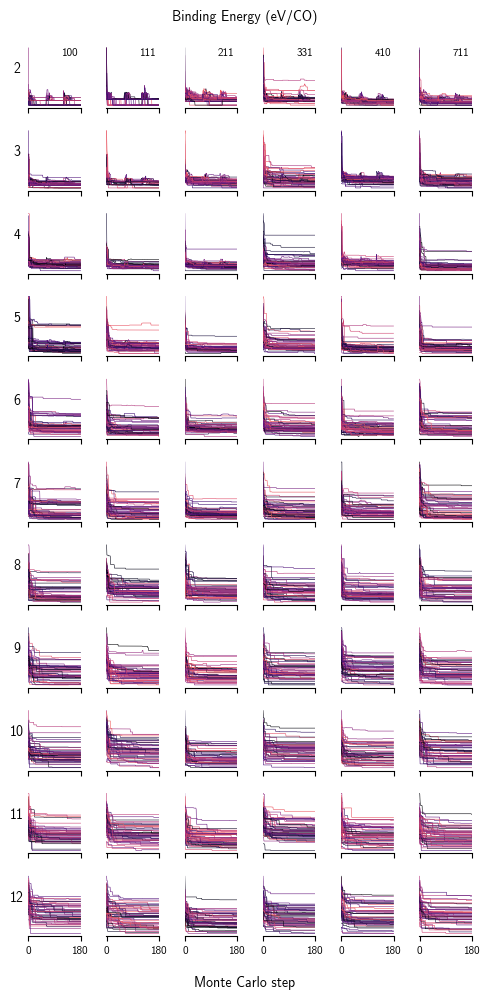

In [10]:
fig, axs = plt.subplots(11, 6, figsize=(5, 10), sharex=True)

bins = np.linspace(-0.6, 6.0, 30)

norm = plt.Normalize(0, 1.5)
cmap = lambda x: cm.magma(norm(x))

def random_color():
    return cmap(np.random.uniform())

for facet, n in itertools.product(facets, nads[:11]):
    grp = df.loc[(df["facet"] == facet) & (df["nads"] == n)]
    i, j = n - 2, facets.index(facet)
    ax = axs[i, j]
    
    if len(grp) > 0:
        en = grp.pivot(index="move", columns="replica", values="energy")
        en = en / n
        
        for row_i, row in en.T.iloc[:50].iterrows():                
            ax.plot(row.values, color=random_color(), linewidth=0.4)
    
    if i == 0:
        ax.annotate(facet, (0.95, 0.95), xycoords="axes fraction", ha="right", va="top", fontsize=8)

for ax in axs.reshape(-1):
    ax.spines["left"].set_visible(False)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    
for ax in axs[-1, :]:
    ax.set_xlim(-1, 180)
    ticks = [0, 180]
    ax.set_xticks(ticks)
    ax.set_xticklabels(ticks, fontsize=8)
    
for i, ax in enumerate(axs[:, 0], 2):
    ax.set_ylabel(i, rotation=0, labelpad=8)

fig.supxlabel("Monte Carlo step", y=0.01, fontsize=10)
# fig.supylabel("Num. Adsorbates", x=0.07, fontsize=10)
fig.suptitle("Binding Energy (eV/CO)", fontsize=10, y=0.99)

fig.tight_layout()
savefig(fig, "04-mcmc-profile-all-1.png", dpi=300)
plt.show()

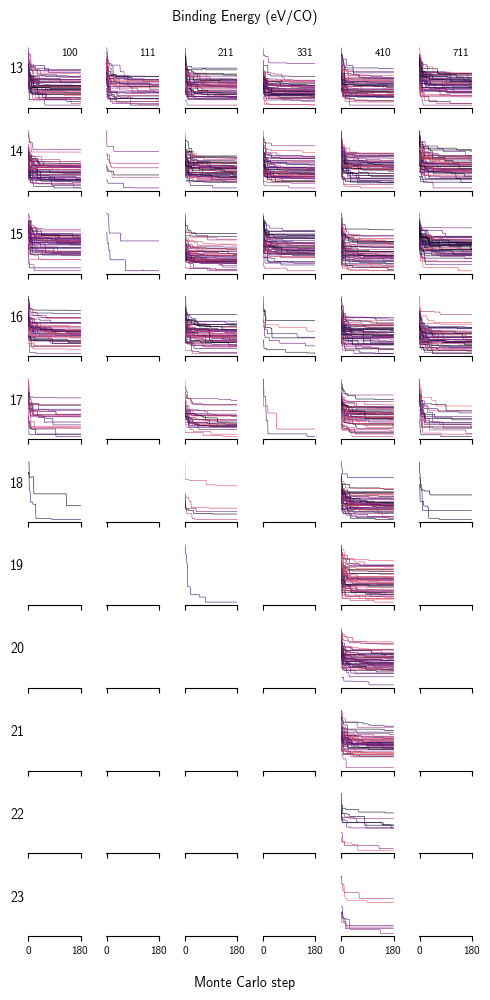

In [11]:
fig, axs = plt.subplots(11, 6, figsize=(5, 10), sharex=True)

bins = np.linspace(-0.6, 6.0, 30)

norm = plt.Normalize(0, 1.5)
cmap = lambda x: cm.magma(norm(x))

def random_color():
    return cmap(np.random.uniform())

for facet, n in itertools.product(facets, nads[11:]):
    grp = df.loc[(df["facet"] == facet) & (df["nads"] == n)]
    i, j = n - 13, facets.index(facet)
    ax = axs[i, j]
    
    if len(grp) > 0:
        en = grp.pivot(index="move", columns="replica", values="energy")
        en = en / n
        
        for row_i, row in en.T.iloc[:50].iterrows():                
            ax.plot(row.values, color=random_color(), linewidth=0.4)
    
    if i == 0:
        ax.annotate(facet, (0.95, 0.95), xycoords="axes fraction", ha="right", va="top", fontsize=8)

for ax in axs.reshape(-1):
    ax.spines["left"].set_visible(False)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    
for ax in axs[-1, :]:
    ax.set_xlim(-1, 180)
    ticks = [0, 180]
    ax.set_xticks(ticks)
    ax.set_xticklabels(ticks, fontsize=8)
    
for i, ax in enumerate(axs[:, 0], 13):
    ax.set_ylabel(i, rotation=0, labelpad=8)

fig.supxlabel("Monte Carlo step", y=0.01, fontsize=10)
# fig.supylabel("Num. Adsorbates", x=0.07, fontsize=10)
fig.suptitle("Binding Energy (eV/CO)", fontsize=10, y=0.99)

fig.tight_layout()
savefig(fig, "04-mcmc-profile-all-2.png", dpi=300)
plt.show()